In [32]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from IPython.display import JSON

In [30]:
with open('project2_data_loan_data_json.json') as json_file:
  data =json.load(json_file)
print(data)

[{'credit.policy': 1, 'purpose': 'debt_consolidation', 'int.rate': 0.1189, 'installment': 829.1, 'log.annual.inc': 11.35040654, 'dti': 19.48, 'fico': 737, 'days.with.cr.line': 5639.958333, 'revol.bal': 28854, 'revol.util': 52.1, 'inq.last.6mths': 0, 'delinq.2yrs': 0, 'pub.rec': 0, 'not.fully.paid': 0}, {'credit.policy': 1, 'purpose': 'credit_card', 'int.rate': 0.1071, 'installment': 228.22, 'log.annual.inc': 11.08214255, 'dti': 14.29, 'fico': 707, 'days.with.cr.line': 2760, 'revol.bal': 33623, 'revol.util': 76.7, 'inq.last.6mths': 0, 'delinq.2yrs': 0, 'pub.rec': 0, 'not.fully.paid': 0}, {'credit.policy': 1, 'purpose': 'debt_consolidation', 'int.rate': 0.1357, 'installment': 366.86, 'log.annual.inc': 10.37349118, 'dti': 11.63, 'fico': 682, 'days.with.cr.line': 4710, 'revol.bal': 3511, 'revol.util': 25.6, 'inq.last.6mths': 1, 'delinq.2yrs': 0, 'pub.rec': 0, 'not.fully.paid': 0}, {'credit.policy': 1, 'purpose': 'debt_consolidation', 'int.rate': 0.1008, 'installment': 162.34, 'log.annual.i

In [33]:
JSON(data)

<IPython.core.display.JSON object>

# Transform json to dataFrame

In [34]:
loanData = pd.DataFrame(data)
loanData

credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082143  14.29   707        2760.000000      33623        76.7   
2          10.373491  11.63   682        4710.000000       3511        25.6   
3          11.350407   8.10   712        2699.958333      33667        73.2   
4          11.299732  14.97   667        4066.000000       4740        39.5   
...              ...    ...   ...                ...        ...         ...   
9573       12.180755  10.39   672       10474.000000     215372        82.1   
9574       11.141862   0.21   722        4380.000000        184         1.1   
9575       10.596635  13.09   687        3450.041667      10036        82.9   
9576       10.819778  19.18   692        1800.000000          0         3.2   
9577       11.264464  16.28   732        4740.000000      37879        57.0   

      inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid  
0                  0            0        0               0  
1                  0            0        0               0  
2                  1            0        0               0  
3                  1            0        0               0  
4                  0            1        0               0  
...              ...          ...      ...             ...  
9573               2            0        0               1  
9574               5            0        0               1  
9575               8            0        0               1  
9576               5            0        0               1  
9577               6            0        0               1  

[9578 rows x 14 columns]

# unique values

In [35]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [37]:
loanData['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

In [38]:
loanData['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [39]:
loanData.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

In [40]:
loanData['int.rate'].describe()

count    9578.000000
mean        0.122640
std         0.026847
min         0.060000
25%         0.103900
50%         0.122100
75%         0.140700
max         0.216400
Name: int.rate, dtype: float64

In [41]:
loanData['fico'].describe()

count    9578.000000
mean      710.846314
std        37.970537
min       612.000000
25%       682.000000
50%       707.000000
75%       737.000000
max       827.000000
Name: fico, dtype: float64

# Convert log to regular values(exp)

In [42]:
loanData['Annual Income'] = np.exp(loanData['log.annual.inc'])

# fico
## using excpetions

In [43]:
'''
fico >= 300 and < 400: 'Very Poor'
fico >= 400 and ficoscore < 600: 'Poor' 
fico >= 601 and ficoscore < 660: 'Fair' 
fico >= 660 and ficoscore < 780: 'Good' 
fico >=780: 'Excellent'
'''
def ficocat(fico):
    try:
        if fico >= 300 and fico < 400:
          ficocat='very poor'
        elif fico >= 400 and fico < 600:
          ficocat='Poor'
        elif fico >= 601 and fico < 660:
          ficocat  = 'Fair'
        elif fico >= 660 and fico < 780:
          ficocat='Good'
        elif fico >=780:
          ficocat = 'Excellent'
        else:
          ficocat = 'unknown'
    except:
        ficocat = 'Error - unknown'
    return ficocat

loanData['fico.category'] = loanData['fico'].apply(ficocat)

In [44]:
loanData.loc[loanData['int.rate']>0.12,'int.rate.type'] = 'High'
loanData.loc[loanData['int.rate']<=0.12,'int.rate.type'] = 'Low'

In [19]:
loanData.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  Annual Income fico.category  \
0            0        0               0   85000.000385          Good   
1            0        0               0   65000.000073          Good   
2            0        0               0   31999.999943          Good   
3            0        0               0   85000.000385          Good   
4            1        0               0   80799.999636          Good   

  int.rate.type  
0           Low  
1           Low  
2          High  
3           Low  
4          High

# Plots

In [21]:
#number of loans/rowsby fico category 
catplot = loanData.groupby(['fico.category']).size()
catplot

fico.category
Excellent     521
Fair          489
Good         8568
dtype: int64

In [22]:
loanData['fico.category'].value_counts()

Good         8568
Excellent     521
Fair          489
Name: fico.category, dtype: int64

In [23]:
Purposeplot = loanData.groupby(['purpose']).size()
Purposeplot

purpose
all_other             2331
credit_card           1262
debt_consolidation    3957
educational            343
home_improvement       629
major_purchase         437
small_business         619
dtype: int64

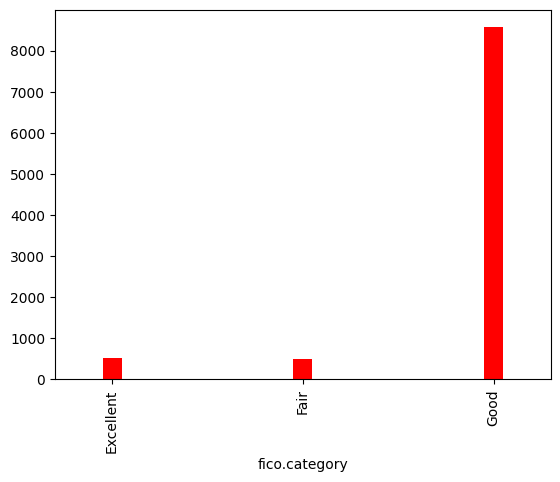

In [24]:
catplot.plot.bar(color = 'red',width=0.1)
plt.show()

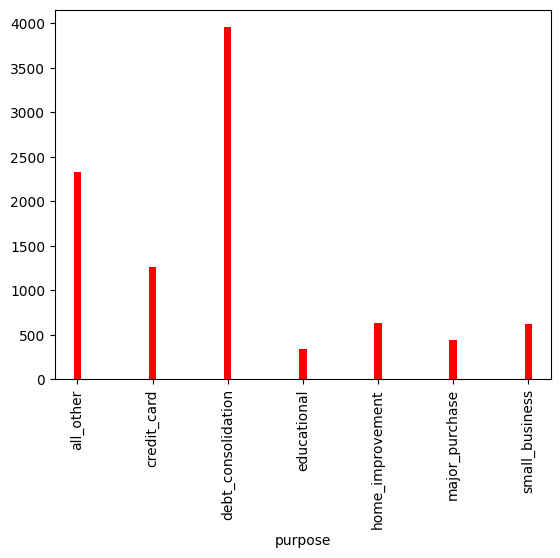

In [25]:
Purposeplot.plot.bar(color = 'red',width=0.1)
plt.show()

In [26]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
 14  Annual Income      9578 non-null   float64
 15  fico.category      9578 non-null   object 
 16  int.rate.type      9578 

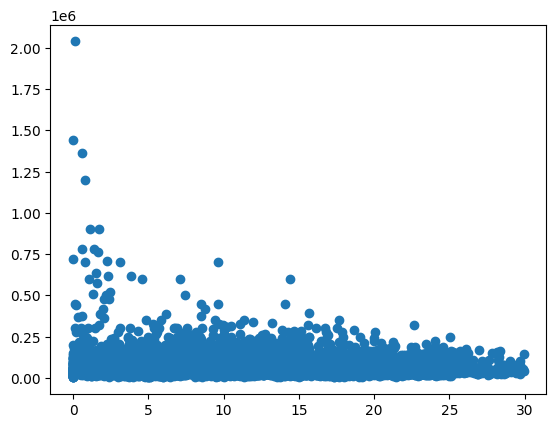

In [27]:
#scatter


ypoint = loanData['Annual Income']

xpoint = loanData['dti']

plt.scatter(xpoint,ypoint)

plt.show()

In [45]:

loanData.to_csv('project2_clean_data.csv',index = False)